## Boom Bikes

### Import Libraries

In [362]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

### Read and understand the data

In [363]:
boom_bike = pd.read_csv('day.csv')
boom_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [364]:
boom_bike.shape

(730, 16)

In [365]:
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [366]:
boom_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [367]:
## Drop redundant columns
boom_bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [368]:
boom_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### create categorical variable 

In [369]:
# Converting season
boom_bike['season'].replace([1,2,3,4],['spring', 'summer', 'fall', 'winter'], inplace=True)

# Converting mnth
boom_bike['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace=True)


# Weathersit
boom_bike['weathersit'].replace([1,2,3,4],['Clear','Mist','Light Rain','Heavy Rain'], inplace=True)

# Converting  weekday
boom_bike['weekday'].replace([0,1,2,3,4,5,6],['Sun','Mon','Tue','Wed','Thu','Fri','Sat'], inplace=True)

boom_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Data visulization

<AxesSubplot:xlabel='yr', ylabel='cnt'>

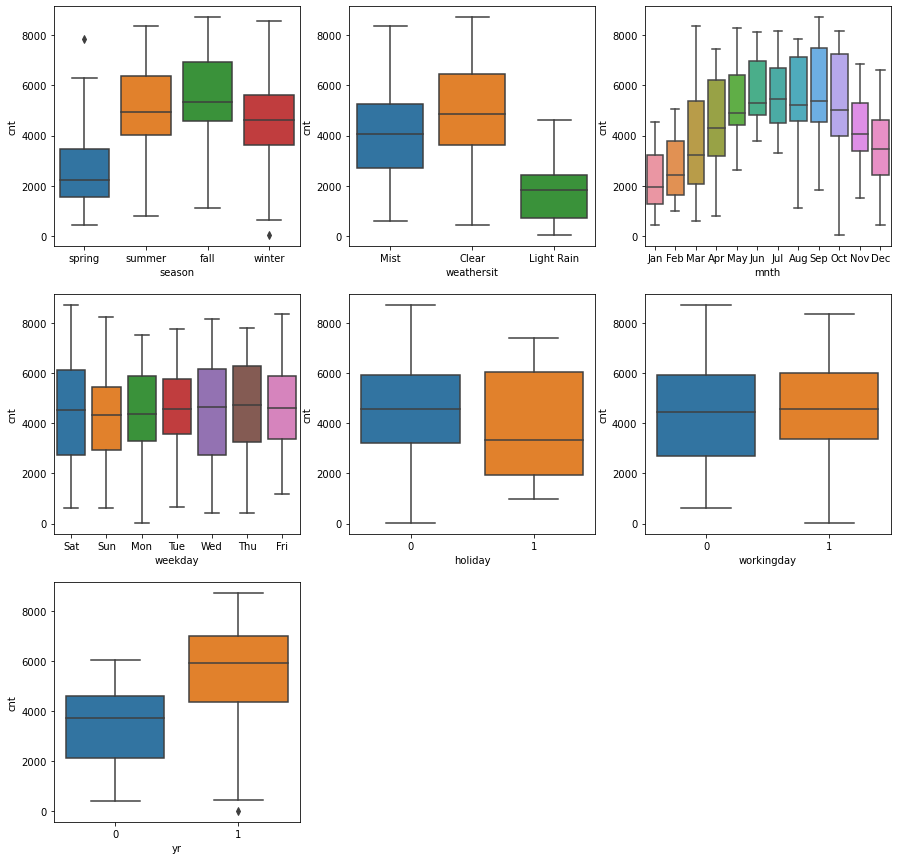

In [370]:
#plot category variables
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data = boom_bike)
plt.subplot(3,3,2)
sns.boxplot(x='weathersit', y='cnt', data = boom_bike)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data = boom_bike)
plt.subplot(3,3,4)
sns.boxplot(x='weekday', y='cnt', data = boom_bike)
plt.subplot(3,3,5)
sns.boxplot(x='holiday', y='cnt', data = boom_bike)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data = boom_bike)
plt.subplot(3,3,7)
sns.boxplot(x='yr', y='cnt', data = boom_bike)

* 2019 has more demand
* Clear weather has more demand
* fall followed by summer has more demand than others

#### plot numerical variables

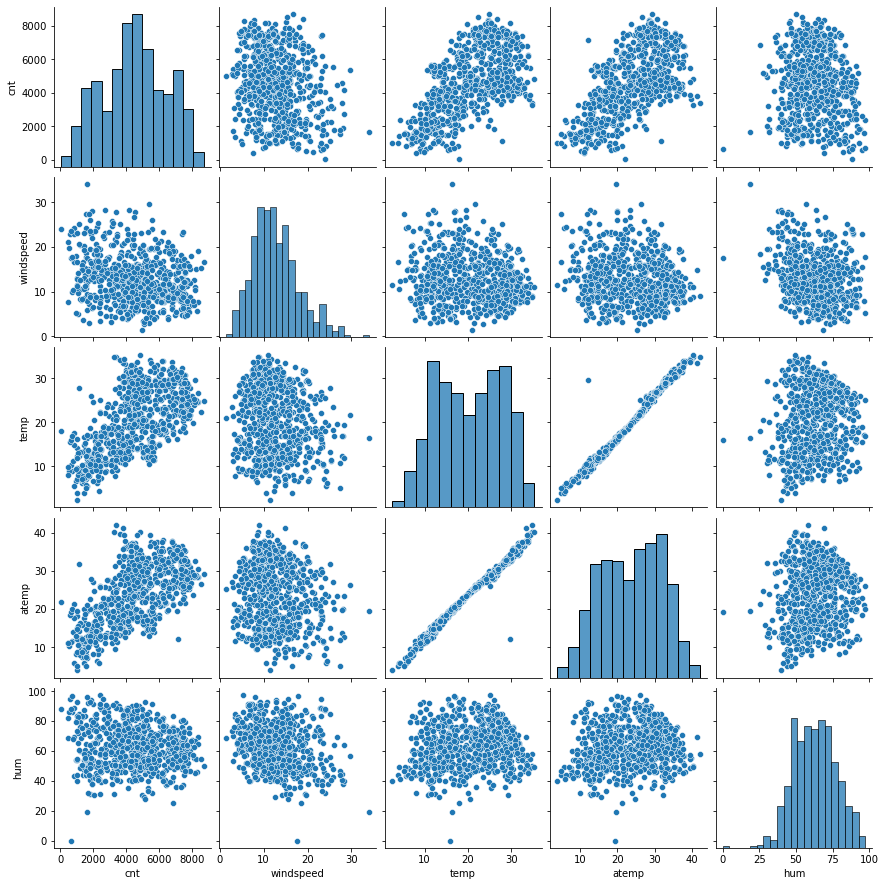

In [371]:
# Get numerical variables

numerical_cols = boom_bike[['cnt','windspeed','temp','atemp','hum']]
sns.pairplot(numerical_cols)
plt.show()

#### check correlatation

In [372]:
boom_bike_corr = boom_bike.corr()
boom_bike_corr

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


<AxesSubplot:>

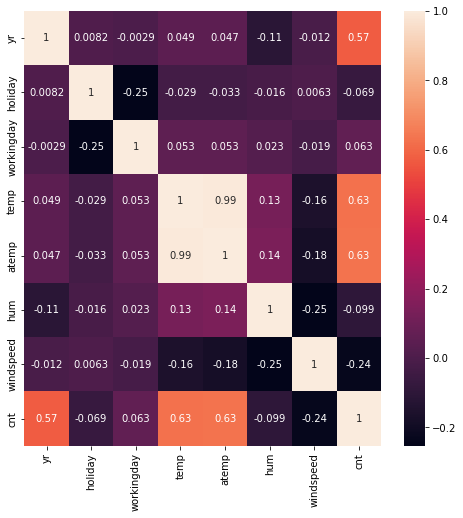

In [373]:
plt.figure(figsize = (8,8))
sns.heatmap(boom_bike.corr(),  annot=True)

atemp and temp are highly correlated, one needs to be dropped. atemp will be dropped.
cnt has highest correlation with temp and atemp


In [374]:
boom_bike.drop('atemp', axis =1, inplace=True )

In [375]:
boom_bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Data Prep

In [376]:
## Create Dummy variable

dummy_vars = pd.get_dummies(boom_bike[['season','weathersit','weekday','mnth']], drop_first=True)
dummy_vars.head()

,season_spring,season_summer,season_winter,weathersit_Light Rain,weathersit_Mist,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [377]:
boom_bike = pd.concat([boom_bike,dummy_vars], axis=1)   
boom_bike = boom_bike.drop(['season','weathersit','weekday','mnth'], axis=1)
boom_bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Split data in training and testing set

In [378]:
boom_bike_train, boom_bike_test = model_selection.train_test_split(boom_bike,train_size = 0.7, random_state=100)

In [379]:
print('Train data shape:' , boom_bike_train.shape)
print('Test data shape :' , boom_bike_test.shape)

Train data shape: (510, 29)
Test data shape : (220, 29)


### Scaling 

In [380]:
scaler = MinMaxScaler()
cols = boom_bike_train.columns
boom_bike_train[cols] = scaler.fit_transform(boom_bike_train[cols])

In [381]:
boom_bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
576,1.0,0.0,1.0,0.815169,0.725633,0.264686,0.827658,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,0.0,0.0,0.442393,0.640189,0.255342,0.465255,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
728,1.0,0.0,0.0,0.245101,0.498067,0.663106,0.204096,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.0,0.0,0.395666,0.504508,0.188475,0.482973,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,1.0,0.345824,0.751824,0.380981,0.191095,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

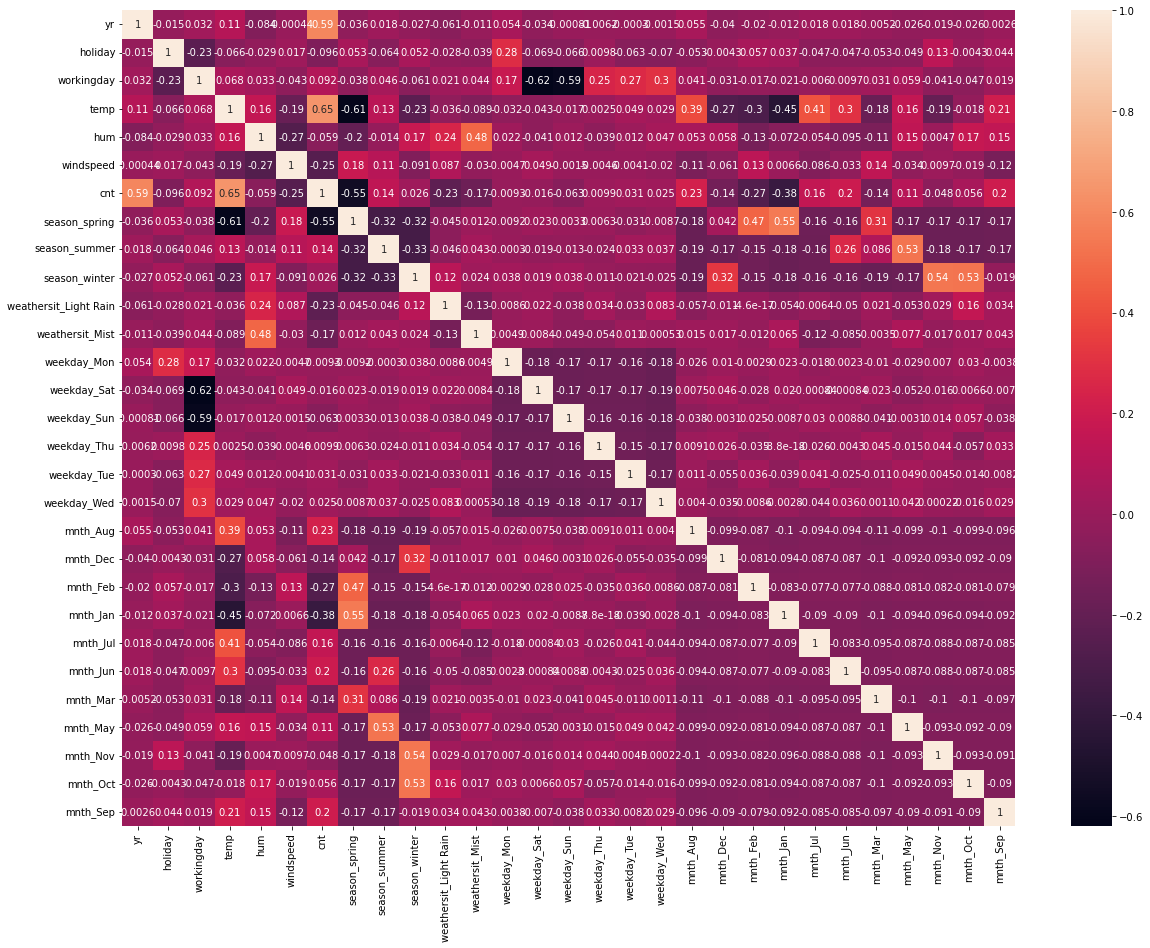

In [382]:
plt.figure(figsize=(20,15))
correlation = boom_bike_train.corr()
sns.heatmap(correlation, annot=True)

### Build Linear Model

In [383]:
# Training set for independent and dependent variables 
y_train = boom_bike_train.pop('cnt')
X_train = boom_bike_train


### RFE

In [384]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [385]:
rfe = RFE(lm,12)
rfe = rfe.fit(X_train, y_train)

In [386]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Mist', True, 1),
 ('weekday_Mon', False, 11),
 ('weekday_Sat', False, 2),
 ('weekday_Sun', False, 10),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 12),
 ('weekday_Wed', False, 14),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 6),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 5),
 ('mnth_Oct', False, 15),
 ('mnth_Sep', True, 1)]

In [387]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_Light Rain',
       'weathersit_Mist', 'mnth_Jul', 'mnth_Sep'],
      dtype='object')

In [388]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

#### Applying Statmodel on RFE (Manually)

In [389]:
## utility methods

def checkVIF(data_frame):
    vif = pd.DataFrame()
    vif['Features'] = data_frame.columns
    vif['VIF'] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 


In [390]:
checkVIF(X_train_rfe)

,Features,VIF
3,hum,28.03
2,temp,16.03
4,windspeed,4.65
5,season_spring,4.01
7,season_winter,3.33
6,season_summer,2.79
9,weathersit_Mist,2.28
0,yr,2.08
10,mnth_Jul,1.58
11,mnth_Sep,1.38


In [391]:
## build sm model
def build_sm_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return (X,lm)

#### Build SM model 1

In [392]:
X_train_lm_1,lm = build_sm_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.95e-190
Time:                        22:25:55   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [393]:
checkVIF(X_train_lm_1)

,Features,VIF
0,const,74.37
6,season_spring,5.02
3,temp,3.61
8,season_winter,3.48
7,season_summer,2.62
4,hum,1.89
10,weathersit_Mist,1.56
11,mnth_Jul,1.48
12,mnth_Sep,1.30
9,weathersit_Light Rain,1.24


#### Model 2

In [394]:
X_train_new = X_train_lm_1.drop(['season_spring'], axis = 1) ## droping spring
checkVIF(X_train_new)

,Features,VIF
0,const,44.97
4,hum,1.87
3,temp,1.60
9,weathersit_Mist,1.55
10,mnth_Jul,1.43
6,season_summer,1.33
7,season_winter,1.29
8,weathersit_Light Rain,1.24
11,mnth_Sep,1.19
5,windspeed,1.18


In [395]:
X_train_lm_2,lm_2 = build_sm_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          6.89e-190
Time:                        22:25:55   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

* All predictors have VIF less than 5
* P values  are close to zero.


In [396]:
y_train_pred = lm_2.predict(X_train_lm_2)

### Residual Analysis and Model evaluation

Text(0.5, 0, 'Errors')

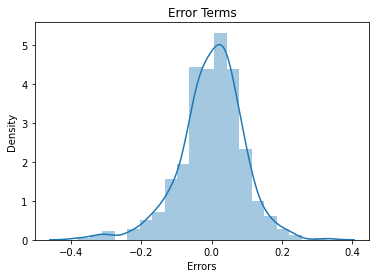

In [397]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
plt.title("Error Terms")
plt.xlabel("Errors")

* Error terms are normally distributed.

## Predicting with model

In [398]:
cols = boom_bike_test.columns
boom_bike_test[cols] = scaler.transform(boom_bike_test[cols])

# Test set for independent and dependent variables 
y_test = boom_bike_test.pop('cnt')
X_test = boom_bike_test

In [399]:
select_cols= X_train_lm_2.columns
print(select_cols)

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'weathersit_Light Rain', 'weathersit_Mist', 'mnth_Jul',
       'mnth_Sep'],
      dtype='object')


In [400]:
select_cols=select_cols.drop('const')

In [401]:
X_test=X_test[select_cols]
X_test.head()

,yr,holiday,temp,hum,windspeed,season_summer,season_winter,weathersit_Light Rain,weathersit_Mist,mnth_Jul,mnth_Sep
184,0.0,1.0,0.831783,0.657364,0.084219,0.0,0.0,0.0,1.0,1.0,0.0
535,1.0,0.0,0.901354,0.610133,0.153728,1.0,0.0,0.0,0.0,0.0,0.0
299,0.0,0.0,0.511964,0.837699,0.334206,0.0,1.0,0.0,1.0,0.0,0.0
221,0.0,0.0,0.881625,0.437098,0.339570,0.0,0.0,0.0,0.0,0.0,0.0
152,0.0,0.0,0.817246,0.314298,0.537414,1.0,0.0,0.0,0.0,0.0,0.0


In [403]:
X_test_lm_1 = sm.add_constant(X_test)
y_test_pred = lm_2.predict(X_test_lm_1)

### visualization

Text(0, 0.5, 'y_test_pred')

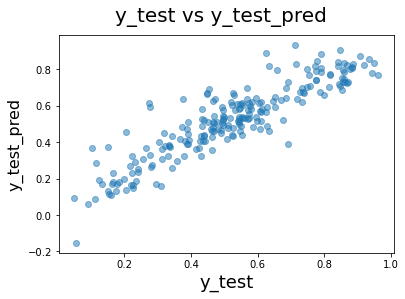

In [404]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 

#### R2 for bike_test dataframe  

In [406]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_test_pred)
print(r2)

0.8050021066128354


#### adjusted R2

In [407]:
## 

n = X_test.shape[0]


# Number of features
p = X_test.shape[1]

# Adjusted R-squared
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.794689718020245

# Summary 

- Top affecting factors:
    - Temperature increase is correlated with count.
    - Light rain or snow is not a good weather for bike sharing.
    
- Note: An Adjusted R-Squared value of 0.79 on the test data signifies that model is good predictor.